In [7]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Générer un jeu de données artificiel
# Créons un jeu de données avec 300 points et 4 clusters bien séparés
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42) 
# cluster_std = Écart type des clusters (contrôle leur dispersion)

X.shape

(300, 2)

In [8]:
# 2. Appliquer K-means avec un nombre de clusters fixé (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)  # Labels prédits par K-means
labels[:10]

array([3, 3, 1, 2, 3, 2, 0, 2, 1, 0])

In [9]:
# 3. Calculer le coefficient de silhouette
silhouette_avg = silhouette_score(X, labels)
print("Coefficient de silhouette moyen :",round(silhouette_avg,2))

Coefficient de silhouette moyen : 0.88


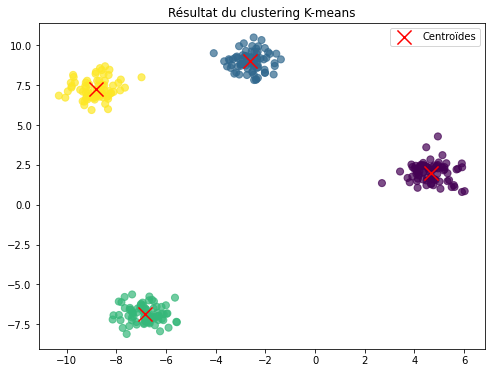

In [10]:
# 4- Visualiser les clusters et leurs centroïdes
plt.figure(figsize=(8, 6))

# Afficher les points colorés selon leur cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

# Afficher les centroïdes
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroïdes')

plt.title("Résultat du clustering K-means")
plt.legend()
plt.show()

Nombre de clusters = 2, Silhouette Score = 0.62
Nombre de clusters = 3, Silhouette Score = 0.80
Nombre de clusters = 4, Silhouette Score = 0.88
Nombre de clusters = 5, Silhouette Score = 0.76
Nombre de clusters = 6, Silhouette Score = 0.59
Nombre de clusters = 7, Silhouette Score = 0.46
Nombre de clusters = 8, Silhouette Score = 0.34
Nombre de clusters = 9, Silhouette Score = 0.35


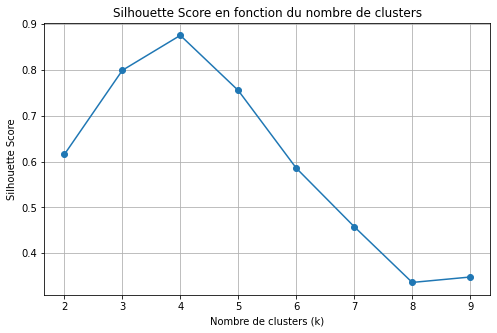

In [11]:
from sklearn.metrics import silhouette_score

# Tester différentes valeurs de k
range_n_clusters = range(2, 10)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Nombre de clusters = {n_clusters}, Silhouette Score = {silhouette_avg:.2f}")

# Tracer les scores de silhouette
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score en fonction du nombre de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()